<a href="https://colab.research.google.com/github/Varshini-svnit/ML_LABS/blob/main/ML9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

In [ ]:
# Cell 1: Load the dataset and preview
# Explanation:
# - The bank dataset uses ';' as separator.
# - We'll load into a DataFrame and show shape, columns, and top rows.

df = pd.read_csv('bank-full.csv', sep=';')  # replace path if required
print("Shape:", df.shape)
print("\nColumns:\n", df.columns.tolist())
display(df.head())


Shape: (45211, 17)

Columns:
 ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [ ]:
# Cell 2: Basic EDA - stats and target distribution
# Explanation:
# - We'll see numeric summary, categorical value counts, and class balance for y.

# Numeric summary
display(df.describe(include=[np.number]).T)

# Categorical summary
display(df.describe(include=[object]).T)

# Target distribution
print("Target counts:")
display(df['y'].value_counts())
print("\nTarget proportions:")
display(df['y'].value_counts(normalize=True))


,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


,count,unique,top,freq
job,45211,12,blue-collar,9732
marital,45211,3,married,27214
education,45211,4,secondary,23202
default,45211,2,no,44396
housing,45211,2,yes,25130
loan,45211,2,no,37967
contact,45211,3,cellular,29285
month,45211,12,may,13766
poutcome,45211,4,unknown,36959
y,45211,2,no,39922


Target counts:


,count
y,
no,39922
yes,5289



Target proportions:


,proportion
y,
no,0.883015
yes,0.116985


Numeric columns: ['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


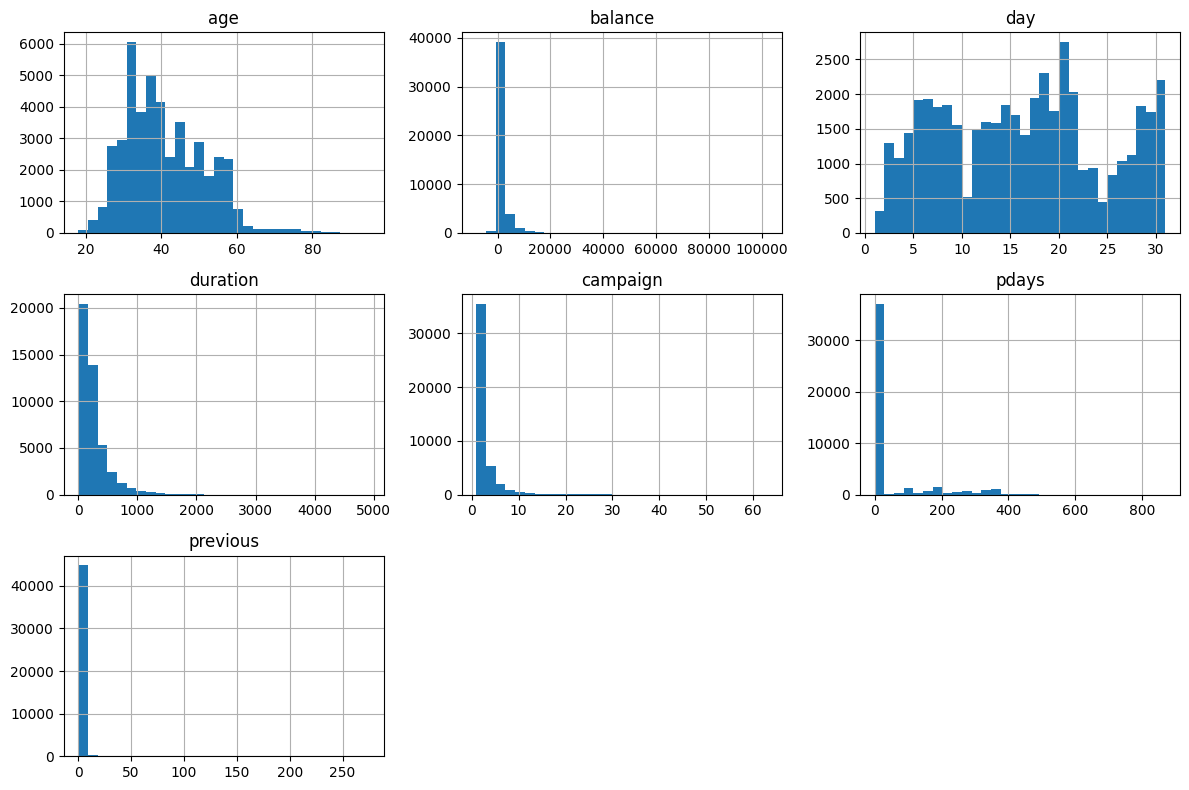

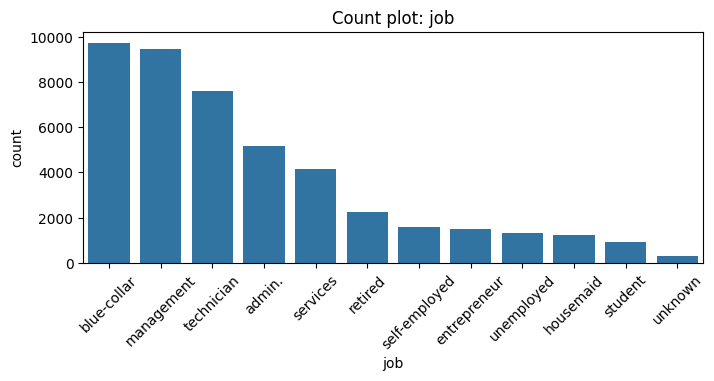

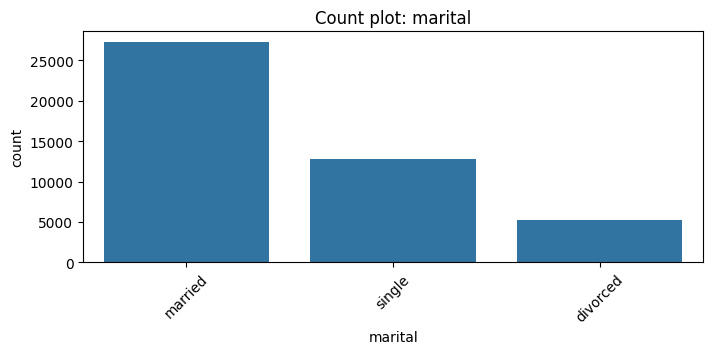

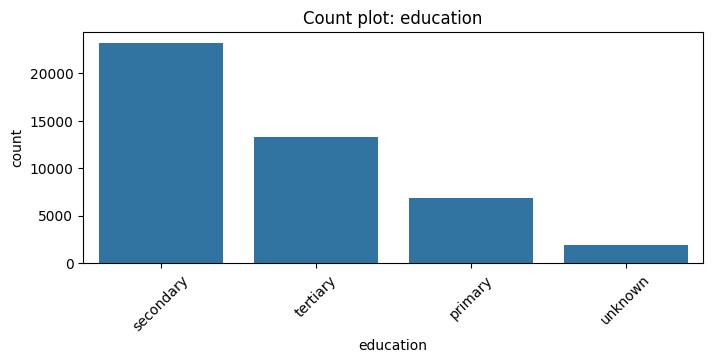

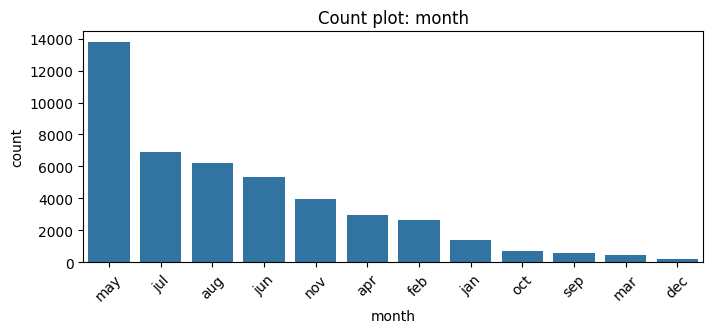

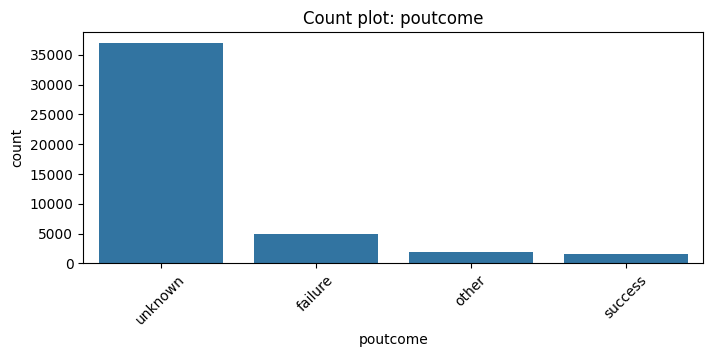

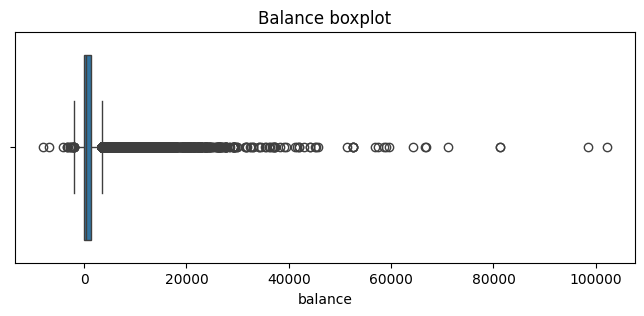

In [ ]:
# Cell 3: Visual EDA - distributions and categorical counts
# Explanation:
# - Plot histograms for numeric features and bar charts for categorical features.
# - Look for outliers and skew.

num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()
print("Numeric columns:", num_cols)
print("Categorical columns:", cat_cols)

# Histograms for numeric (first up to 6)
df[num_cols].hist(figsize=(12,8), bins=30)
plt.tight_layout()
plt.show()

# Bar plots for a few categorical features
for c in ['job','marital','education','month','poutcome'] :
    if c in df.columns:
        plt.figure(figsize=(8,3))
        sns.countplot(data=df, x=c, order=df[c].value_counts().index)
        plt.xticks(rotation=45)
        plt.title(f'Count plot: {c}')
        plt.show()

# Boxplot for balance to spot outliers
plt.figure(figsize=(8,3))
sns.boxplot(x=df['balance'])
plt.title('Balance boxplot')
plt.show()


In [ ]:
# Cell 4: Preprocessing decisions (documented in code)
# Explanation:
# - We'll:
#   1. Drop 'duration' because it's a post-hoc feature (leaks target).
#   2. Convert binary yes/no to 1/0 for some columns.
#   3. One-hot encode categorical variables (drop first to avoid collinearity).
#   4. Replace unknowns optionally (we'll keep 'unknown' as a category unless you want to impute).
#   5. Scale numeric features (standardization) for gradient descent stability.

# Columns present in dataset
df.columns.tolist()


['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

In [ ]:
# Cell 5: Preprocessing implementation & train-test split (80:20 with random shuffle)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Make a copy
data = df.copy()

# 1) Drop duration (leak). If you want to keep it for benchmark, comment this out.
if 'duration' in data.columns:
    data = data.drop(columns=['duration'])

# 2) Binary mapping for 'y'
data['y'] = data['y'].map({'yes':1,'no':0})

# 3) Identify categorical and numeric columns
num_cols = data.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('y')  # keep target out
cat_cols = data.select_dtypes(include=['object']).columns.tolist()

print("Numerical:", num_cols)
print("Categorical:", cat_cols)

# 4) One-hot encode categorical variables (drop_first True to avoid dummy trap)
data_enc = pd.get_dummies(data, columns=cat_cols, drop_first=True)
print("After encoding shape:", data_enc.shape)

# 5) Shuffle and split 80:20
X = data_enc.drop(columns=['y']).values
y = data_enc['y'].values.reshape(-1,1)

# Shuffle with a fixed random seed for reproducibility
rng = np.random.RandomState(42)
permutation = rng.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]

split_idx = int(0.8 * X.shape[0])
X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

print("Train shape:", X_train.shape, y_train.shape)
print("Test shape:", X_test.shape, y_test.shape)

# 6) Scale numeric columns (we need scaler params per numeric feature indices)
#    Find indices of original numeric columns in the encoded array:
encoded_cols = data_enc.drop(columns=['y']).columns.tolist()
num_indices = [encoded_cols.index(c) for c in data_enc.drop(columns=['y']).columns if c in num_cols]

scaler = StandardScaler()
# But StandardScaler expects columns; we will scale only numeric columns:
X_train = X_train.copy().astype(float)
X_test = X_test.copy().astype(float)
X_train[:, num_indices] = scaler.fit_transform(X_train[:, num_indices])
X_test[:, num_indices] = scaler.transform(X_test[:, num_indices])

print("Scaling applied to numeric columns -> indices:", num_indices)


Numerical: ['age', 'balance', 'day', 'campaign', 'pdays', 'previous']
Categorical: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
After encoding shape: (45211, 42)
Train shape: (36168, 41) (36168, 1)
Test shape: (9043, 41) (9043, 1)
Scaling applied to numeric columns -> indices: [0, 1, 2, 3, 4, 5]


In [ ]:
# Cell 6: Logistic Regression implementation from scratch
# Explanation:
# - We'll implement:
#   sigmoid, cost (log-loss), gradient, gradient descent training with L2 regularization optional,
#   predict_proba, predict, and training loop that records loss.

import math
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, n_iter=1000, fit_intercept=True, verbose=False, reg_lambda=0.0):
        self.lr = lr
        self.n_iter = n_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
        self.reg_lambda = reg_lambda  # L2 regularization coefficient

    def _add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))

    def sigmoid(self, z):
        # numerically stable sigmoid
        return 1 / (1 + np.exp(-z))

    def compute_cost(self, X, y, w):
        # X: n x d, y: n x 1, w: d x 1
        m = X.shape[0]
        z = X.dot(w)
        h = self.sigmoid(z)
        # epsilon to avoid log(0)
        eps = 1e-12
        cost = -(1/m) * (y.T.dot(np.log(h + eps)) + (1 - y).T.dot(np.log(1 - h + eps)))
        # add L2 regularization term (exclude bias if intercept)
        reg_term = (self.reg_lambda/(2*m)) * np.sum(w[1:]**2) if self.fit_intercept else (self.reg_lambda/(2*m)) * np.sum(w**2)
        return cost.squeeze() + reg_term

    def fit(self, X, y):
        X_train = X.copy()
        y_train = y.copy()
        if self.fit_intercept:
            X_train = self._add_intercept(X_train)
        n_features = X_train.shape[1]
        # initialize weights
        self.w = np.zeros((n_features, 1))
        self.loss_history = []

        m = X_train.shape[0]
        for i in range(self.n_iter):
            z = X_train.dot(self.w)
            h = self.sigmoid(z)
            # gradient
            grad = (1/m) * X_train.T.dot(h - y_train)
            # add regularization gradient (do not regularize intercept)
            if self.reg_lambda != 0:
                reg_vector = np.vstack([[[0.]], (self.w[1:] * (self.reg_lambda / m))])
                grad = grad + reg_vector
            # gradient descent update
            self.w = self.w - self.lr * grad
            # compute cost
            cost = self.compute_cost(X_train, y_train, self.w)
            self.loss_history.append(cost)
            if self.verbose and i % (self.n_iter // 10 + 1) == 0:
                print(f"Iter {i}/{self.n_iter} - cost: {cost}")
        return self

    def predict_proba(self, X):
        X_input = X.copy()
        if self.fit_intercept:
            X_input = self._add_intercept(X_input)
        probs = self.sigmoid(X_input.dot(self.w))
        return probs

    def predict(self, X, threshold=0.5):
        probs = self.predict_proba(X)
        return (probs >= threshold).astype(int)



Iter 0/5000 - cost: 0.49093798914509607
Iter 501/5000 - cost: 0.3028377081871523
Iter 1002/5000 - cost: 0.300549430122355
Iter 1503/5000 - cost: 0.29997656884022805
Iter 2004/5000 - cost: 0.29977342826939357
Iter 2505/5000 - cost: 0.2996856315030384
Iter 3006/5000 - cost: 0.29964229210563137
Iter 3507/5000 - cost: 0.2996187727509327
Iter 4008/5000 - cost: 0.2996050597379635
Iter 4509/5000 - cost: 0.299596594714555


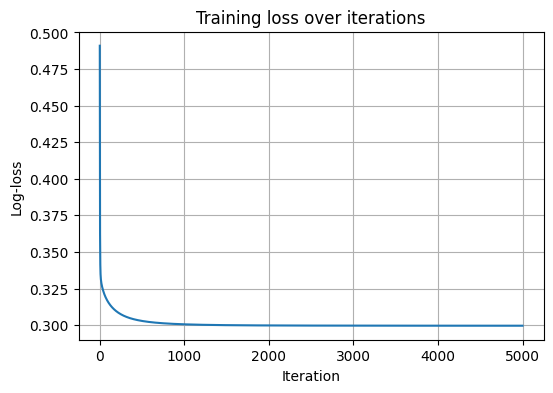

In [ ]:
# Cell 7: Train logistic regression
# Explanation:
# - We'll train with a learning rate and number of iterations.
# - We will see the loss curve to check convergence.

model = LogisticRegressionScratch(lr=0.5, n_iter=5000, verbose=True, reg_lambda=0.01)
model.fit(X_train, y_train)

# Plot loss history
plt.figure(figsize=(6,4))
plt.plot(model.loss_history)
plt.title('Training loss over iterations')
plt.xlabel('Iteration')
plt.ylabel('Log-loss')
plt.grid(True)
plt.show()


Confusion matrix (TP, FP, FN, TN): (176, 108, 887, 7872)
Accuracy: 0.8900
Precision: 0.6197
Recall: 0.1656
F1-score: 0.2613
AUC (ROC): 0.7685


/tmp/ipython-input-2563847926.py:66: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  auc = np.trapz(tprs_sorted, fprs_sorted)


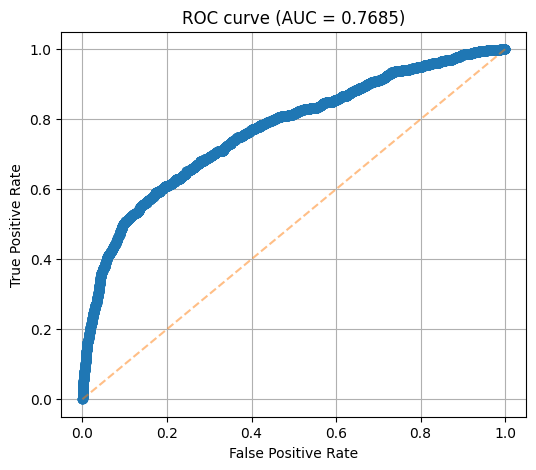

In [ ]:
# Cell 8: Predictions on test set and evaluation metrics (accuracy, precision, recall, F1, confusion matrix)
# Explanation:
# - All metrics implemented directly without sklearn (to follow the "scratch" requirement).
# - Also compute ROC curve and AUC using trapezoidal rule.

def confusion_matrix_from_preds(y_true, y_pred):
    tp = np.sum((y_true==1) & (y_pred==1))
    tn = np.sum((y_true==0) & (y_pred==0))
    fp = np.sum((y_true==0) & (y_pred==1))
    fn = np.sum((y_true==1) & (y_pred==0))
    return int(tp), int(fp), int(fn), int(tn)

def precision_recall_f1(y_true, y_pred):
    tp, fp, fn, tn = confusion_matrix_from_preds(y_true, y_pred)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0.0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0.0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0.0
    return precision, recall, f1

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

# Predictions
y_prob_test = model.predict_proba(X_test).reshape(-1)
y_pred_test = (y_prob_test >= 0.5).astype(int).reshape(-1,1)

# Metrics
acc = accuracy(y_test.reshape(-1,1), y_pred_test)
prec, rec, f1 = precision_recall_f1(y_test.reshape(-1,1), y_pred_test)
tp, fp, fn, tn = confusion_matrix_from_preds(y_test.reshape(-1,1), y_pred_test)

print("Confusion matrix (TP, FP, FN, TN):", (tp, fp, fn, tn))
print(f"Accuracy: {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall: {rec:.4f}")
print(f"F1-score: {f1:.4f}")

# ROC and AUC (implemented from scratch)
def roc_auc_from_scores(y_true, y_scores, pos_label=1):
    # Compute TPR, FPR at distinct thresholds and trapezoidal AUC
    desc_score_indices = np.argsort(-y_scores)
    y_true_sorted = y_true.reshape(-1)[desc_score_indices]
    y_scores_sorted = y_scores[desc_score_indices]
    # unique thresholds
    thresholds = np.unique(y_scores_sorted)[::-1]
    tprs = []
    fprs = []
    P = np.sum(y_true == pos_label)
    N = y_true.shape[0] - P
    for thr in thresholds:
        preds = (y_scores >= thr).astype(int)
        tp = np.sum((y_true.reshape(-1)==pos_label) & (preds==1))
        fp = np.sum((y_true.reshape(-1)!=pos_label) & (preds==1))
        tpr = tp / P if P>0 else 0
        fpr = fp / N if N>0 else 0
        tprs.append(tpr)
        fprs.append(fpr)
    # add (0,0) and (1,1)
    fprs = np.array([0.0] + list(fprs) + [1.0])
    tprs = np.array([0.0] + list(tprs) + [1.0])
    # Sort by FPR increasing
    order = np.argsort(fprs)
    fprs_sorted = fprs[order]
    tprs_sorted = tprs[order]
    # trapezoidal integration
    auc = np.trapz(tprs_sorted, fprs_sorted)
    return fprs_sorted, tprs_sorted, auc

fprs, tprs, auc = roc_auc_from_scores(y_test, y_prob_test)
print(f"AUC (ROC): {auc:.4f}")

# Plot ROC
plt.figure(figsize=(6,5))
plt.plot(fprs, tprs, marker='o', linestyle='-')
plt.plot([0,1],[0,1],'--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC curve (AUC = {auc:.4f})')
plt.grid(True)
plt.show()


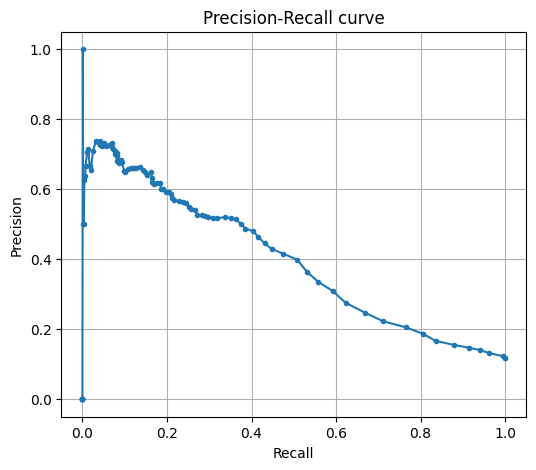

Best threshold by F1: 0.160, Precision: 0.3988, Recall: 0.5080, F1: 0.4468


In [ ]:
# Cell 9: Evaluate different probability thresholds and show Precision-Recall curve
# Explanation:
# - Because class is imbalanced (few 'yes'), precision/recall tradeoff matters.
# - We'll compute precision & recall at thresholds and plot PR curve.

thresholds = np.linspace(0,1,101)
precisions = []
recalls = []
for t in thresholds:
    preds = (y_prob_test >= t).astype(int).reshape(-1,1)
    p, r, _ = precision_recall_f1(y_test.reshape(-1,1), preds)
    precisions.append(p)
    recalls.append(r)

# Plot Precision-Recall
plt.figure(figsize=(6,5))
plt.plot(recalls, precisions, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall curve')
plt.grid(True)
plt.show()

# Find threshold that maximizes F1
f1s = [ (2*p*r/(p+r)) if (p+r)>0 else 0 for p,r in zip(precisions, recalls) ]
best_idx = int(np.argmax(f1s))
best_thr = thresholds[best_idx]
print(f"Best threshold by F1: {best_thr:.3f}, Precision: {precisions[best_idx]:.4f}, Recall: {recalls[best_idx]:.4f}, F1: {f1s[best_idx]:.4f}")


In [ ]:
# Cell 10: Save model weights and feature names for reuse
# Explanation:
# - Save weights & column names so you can load and use the model later.

import pickle
feature_names = encoded_cols  # from earlier
model_params = {
    'weights': model.w,        # numpy array
    'feature_names': feature_names,
    'scaler_mean': scaler.mean_ if hasattr(scaler, 'mean_') else None,
    'scaler_scale': scaler.scale_ if hasattr(scaler, 'scale_') else None,
}
with open('logreg_scratch_model.pkl', 'wb') as f:
    pickle.dump(model_params, f)

print("Saved model parameters to logreg_scratch_model.pkl")


Saved model parameters to logreg_scratch_model.pkl
